In [191]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy

## Analysis of data structure
### Importing the dataset.. Reading the .csv files

We have 3 .csv files which are seperated with tabulators. The files provide information about users, their shopping sessions and about the shop they've visited.



In [192]:
productData = pd.read_csv("dataset/product.csv",sep="\t")

In [193]:
print(f"Product Data:\nNumber of records: {productData.shape[0]}\nNumber of attributes: {productData.shape[1]}")

Product Data:
Number of records: 14975
Number of attributes: 4


In [194]:
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14975 non-null  object
 1   product_ean  14975 non-null  int64 
 2   code         14960 non-null  object
 3   store_name   14975 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.1+ KB


In [339]:
userData = pd.read_csv("dataset/user.csv",sep="\t")

In [340]:
print(f"User Data:\nNumber of records: {userData.shape[0]}\nNumber of attributes: {userData.shape[1]}")

User Data:
Number of records: 2525
Number of attributes: 11


In [304]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               1263 non-null   object
 1   residence         884 non-null    object
 2   username          2525 non-null   object
 3   user_id           2525 non-null   int64 
 4   address           2146 non-null   object
 5   current_location  2399 non-null   object
 6   registration      2525 non-null   object
 7   race              757 non-null    object
 8   name              2525 non-null   object
 9   birthdate         1389 non-null   object
 10  mail              2525 non-null   object
dtypes: int64(1), object(10)
memory usage: 217.1+ KB


In [198]:
sessionData = pd.read_csv("dataset/session.csv",sep="\t")

In [199]:
print(f"Session Data:\nNumber of records: {sessionData.shape[0]}\nNumber of attributes: {sessionData.shape[1]}")

Session Data:
Number of records: 11107
Number of attributes: 25


In the info we see that sessionData has string object columns. That's a problem in the data, so we need to convert it to something reasonable

In [200]:
sessionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_click_product_info          11096 non-null  float64
 1   user_id                         11107 non-null  int64  
 2   screen_height                   11107 non-null  object 
 3   pct_scroll_move_duration        11096 non-null  float64
 4   scroll_move_total_rel_distance  11096 non-null  float64
 5   pct_click                       11096 non-null  float64
 6   pct_scrandom                    11095 non-null  float64
 7   pct_wild_mouse                  11096 non-null  float64
 8   session_id                      11107 non-null  int64  
 9   browser_name                    11107 non-null  object 
 10  pct_input                       11096 non-null  float64
 11  screen_width                    11107 non-null  object 
 12  mouse_move_total_rel_distance   

## Session Data
-change datatypes to work with them

session_start should be a timestamp, so we use to_datetime() to convert it

In [212]:
sessionData["session_start"] = pd.to_datetime(sessionData["session_start"])

In [213]:
sessionData.screen_height.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11107 entries, 0 to 11106
Series name: screen_height
Non-Null Count  Dtype
--------------  -----
11107 non-null  int64
dtypes: int64(1)
memory usage: 86.9 KB


we sort the sessionData by the session_start (date)

In [214]:
sessionDataByDate = sessionData.sort_values(by="session_start")

we set the index of sessionData to session_start (date)

In [215]:
sessionDataByDate.set_index("session_start", inplace=True)

replacing ack 1/0 values with True/False

In [216]:
a = [bool(val) for val in sessionDataByDate["ack"]]
sessionDataByDate["ack"] = a

replacing higher/lower in screen height/width columns with the max and min values of the columns (higher = max , lower = min)

In [217]:
heights = [int(i) for i in sessionDataByDate.screen_height.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(heights),"higher": max(heights)}

sessionDataByDate.screen_height = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionDataByDate["screen_height"] ]

In [218]:
widths = [int(i) for i in sessionDataByDate.screen_width.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(widths),"higher": max(widths)}

sessionDataByDate.screen_width = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionDataByDate["screen_width"]]

replacing browser names with numbers from 0 to 6

In [219]:
print("Unique browser_names in sessionData: " + str(len(sessionData.browser_name.unique())))
browsers = {k:v for k,v in zip(sessionData.browser_name.unique(), range(len(sessionData.browser_name.unique())))}
print(browsers)

Unique browser_names in sessionData: 7
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [220]:
sessionData.browser_name = [browsers.get(browser) for browser in sessionData.browser_name]

In [221]:
#sns.pairplot(sessionData.dropna(), hue="ack")

Correlations with ack

In [222]:
sessionDataByDate

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
session_start,,,,,,,,,,,,,,,,,,,,,
2018-09-23 07:30:51,57.98110,1539,600,15.35176,16.33379,11.75847,52.16685,61.57892,1172609,3,...,17.61522,12.80540,15.06070,61.47041,True,14.10464,4.83679,65.61724,2678457881817,100.00093
2018-09-23 08:54:11,53.61713,84,768,9.74751,17.80263,14.65637,63.14275,45.05406,288355,1,...,11.24297,13.77017,12.54515,52.56942,True,19.89456,7.44597,49.94242,1292520804483,127.99554
2018-09-23 12:02:29,61.80545,1901,1080,16.67507,14.31640,8.84203,57.89960,63.23207,397459,2,...,13.61932,13.97541,12.05241,55.73529,True,15.12488,0.86515,37.51318,1867578950224,265.20668
2018-09-23 12:02:29,61.80545,1901,1080,16.67507,14.31640,8.84203,57.89960,63.23207,397459,2,...,13.61932,13.97541,12.05241,55.73529,True,15.12488,0.86515,37.51318,1867578950224,265.20668
2018-09-23 20:14:07,58.34750,2186,1080,14.48179,14.75157,9.91497,62.28795,67.28553,773816,0,...,13.98346,14.83689,13.32245,73.60433,True,16.52631,5.46085,44.01605,9367147494323,91.73919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21 08:00:33,38.34709,811,768,14.18408,14.88543,10.95778,41.54954,59.63376,922230,1,...,17.48570,14.74171,15.41170,43.08487,True,14.32515,3.73475,47.71653,1083059587790,156.14093
2023-09-21 13:40:54,38.81171,2083,600,14.32758,14.23896,9.04556,67.67538,70.07579,62840,2,...,18.06592,12.97589,16.26661,52.66724,True,15.47538,0.92403,70.97435,1822982612120,128.78446
2023-09-22 03:24:42,48.26259,368,600,19.35009,9.66021,11.78277,45.31835,50.28623,662522,2,...,10.96483,13.41635,14.91388,63.18888,False,12.88238,2.67370,48.24125,4379898189637,104.33555


In [223]:
correlation_data = []
for column in sessionDataByDate.columns:
    if column != "ack":
        correlation = sessionDataByDate['ack'].corr(sessionDataByDate[column])
        correlation_data.append((column, correlation))

correlation_df = pd.DataFrame(correlation_data, columns=["Column", "Correlation with 'ack'"])
print(correlation_df.to_string(index=False))


                        Column  Correlation with 'ack'
        pct_click_product_info                0.016203
                       user_id               -0.015086
                 screen_height                0.018981
      pct_scroll_move_duration               -0.002601
scroll_move_total_rel_distance                0.748836
                     pct_click               -0.365507
                  pct_scrandom               -0.004392
                pct_wild_mouse                0.005942
                    session_id                0.003958
                  browser_name               -0.012061
                     pct_input                0.020071
                  screen_width                0.004227
 mouse_move_total_rel_distance               -0.005957
               pct_mouse_click               -0.013861
           wild_mouse_duration                0.159883
                pct_mouse_move                0.010394
               pct_doubleclick               -0.411079
          

## Basic descriptive statistics and Shapiro-Wilk test for Normal(Gaussian) Distribution

In [91]:
def normalityTest(shapiro):
    if shapiro.pvalue > 0.05:
        print(f"{shapiro.pvalue} > 0.05\t-> data is Normally distributed")
    else:
        print(f"{shapiro.pvalue} < 0.05\t-> data is not Normally distributed")

for column in sessionData.columns:
    if column != "session_start":
        print(column)
        normalityTest(scipy.stats.shapiro(sessionDataByDate[column]))

sessionDataByDate.describe()

pct_click_product_info
1.0 > 0.05	-> data is Normally distributed
user_id
0.0 < 0.05	-> data is not Normally distributed
screen_height
0.0 < 0.05	-> data is not Normally distributed
pct_scroll_move_duration
1.0 > 0.05	-> data is Normally distributed
scroll_move_total_rel_distance
1.0 > 0.05	-> data is Normally distributed
pct_click
1.0 > 0.05	-> data is Normally distributed
pct_scrandom
1.0 > 0.05	-> data is Normally distributed
pct_wild_mouse
1.0 > 0.05	-> data is Normally distributed
session_id
0.0 < 0.05	-> data is not Normally distributed
browser_name
0.0 < 0.05	-> data is not Normally distributed
pct_input
1.0 > 0.05	-> data is Normally distributed
screen_width
0.0 < 0.05	-> data is not Normally distributed
mouse_move_total_rel_distance
1.0 > 0.05	-> data is Normally distributed
pct_mouse_click
1.0 > 0.05	-> data is Normally distributed
wild_mouse_duration
1.0 > 0.05	-> data is Normally distributed
pct_mouse_move
1.0 > 0.05	-> data is Normally distributed
pct_doubleclick
1.0 > 0.0

C:\Users\pc-Gábor\Documents\FIIT\zadanie\venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
count,11096.000000,11107.000000,11107.000000,11096.000000,11096.000000,11096.000000,11095.000000,11096.000000,1.110700e+04,11107.000000,...,11096.000000,11096.000000,11096.000000,11095.000000,11096.000000,11096.000000,11107.000000,11096.000000,1.110700e+04,11107.000000
mean,50.483726,1235.776987,850.408571,15.238943,13.721452,12.608135,48.899014,47.723073,7.438971e+05,2.127397,...,13.540213,13.579313,13.534801,14.305038,54.489670,14.484636,4.031605,44.107675,5.005687e+12,150.162508
std,13.597192,718.395295,187.099648,1.347392,2.079130,2.102357,12.075291,13.428862,4.312776e+05,1.549087,...,1.000808,3.075740,0.996544,1.932924,12.502856,1.940651,2.844088,13.191977,2.887922e+12,59.364602
min,0.000000,0.000000,600.000000,9.657490,6.669420,4.673820,0.000000,0.000000,1.078000e+03,0.000000,...,9.792600,0.000000,9.338530,6.271650,0.000000,7.377110,0.008030,0.000000,1.119810e+09,-63.972190
25%,41.282710,618.500000,768.000000,14.394348,12.064132,11.098513,40.805340,38.700060,3.731425e+05,1.000000,...,12.861463,11.829973,12.863210,13.273515,45.995368,13.237047,1.940785,35.135140,2.481610e+12,109.926290
50%,50.521630,1229.000000,800.000000,15.245490,14.276540,12.408140,48.843420,47.803490,7.403180e+05,2.000000,...,13.542870,13.458065,13.548215,14.773630,54.543245,14.776720,3.392530,44.067915,4.991186e+12,149.602510
75%,59.644505,1852.500000,1080.000000,16.050898,15.370390,14.039747,56.930055,56.736027,1.112932e+06,3.000000,...,14.227190,15.819170,14.206577,15.645795,62.914325,15.860910,5.445625,52.951955,7.526300e+12,190.384065
max,100.000000,2499.000000,1080.000000,21.056660,18.692900,20.471820,100.000000,100.000000,1.499938e+06,6.000000,...,17.351800,22.915790,17.529780,19.716730,100.000000,22.295860,27.211750,100.000000,9.999900e+12,372.845880


<Axes: xlabel='scroll_move_total_rel_distance', ylabel='ack'>

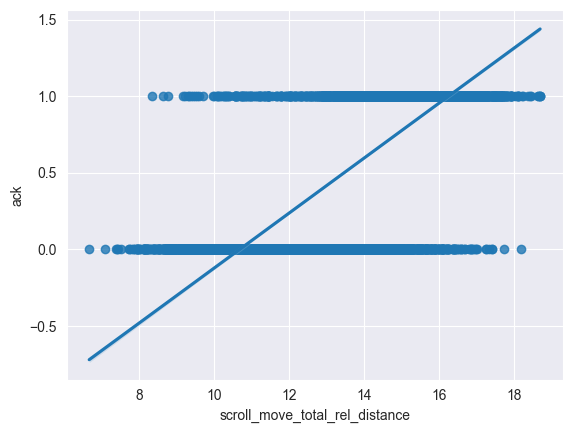

In [134]:
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="wild_mouse_duration") #-0.28
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="mouse_move_total_rel_distance") #0.22
sns.regplot(data=sessionDataByDate.dropna(), x="scroll_move_total_rel_distance",y="ack") #0.74
# sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_click") #-0.6
# sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_input") #0.28
# sns.regplot(data=sessionDataByDate.dropna(), x="mouse_move_total_rel_distance",y="pct_click") #-0.29
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_doubleclick",y="wild_mouse_duration") #0.41

In [99]:
sessionDataByDate.corr()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
pct_click_product_info,1.000000,0.000326,0.007523,0.004251,0.003077,-0.004542,0.003696,0.004052,-0.006344,-0.005408,...,-0.014891,0.012935,-0.008905,0.009318,0.016203,0.022844,0.015809,-0.005129,-0.005883,0.007635
user_id,0.000326,1.000000,-0.014482,-0.007840,0.000148,0.013858,-0.004869,0.007491,-0.006726,-0.012310,...,0.002476,0.006799,0.006065,0.005616,-0.015086,-0.006646,0.004424,-0.009054,-0.003065,-0.008193
screen_height,0.007523,-0.014482,1.000000,-0.011312,0.019207,-0.020951,-0.001251,0.001167,-0.008654,0.001948,...,0.010601,0.023018,-0.022171,-0.003689,0.018981,0.001101,0.019119,-0.010867,-0.002161,0.000028
pct_scroll_move_duration,0.004251,-0.007840,-0.011312,1.000000,-0.145849,0.073057,0.009491,0.006220,0.005457,0.016577,...,-0.288118,0.009151,-0.064477,0.004501,-0.002601,-0.072752,-0.005312,0.003906,0.007914,-0.010987
scroll_move_total_rel_distance,0.003077,0.000148,0.019207,-0.145849,1.000000,-0.186315,-0.001068,0.004258,0.005911,-0.017672,...,0.276726,0.009507,-0.375990,-0.006839,0.748836,0.377375,-0.000306,0.028508,-0.004389,0.003397
pct_click,-0.004542,0.013858,-0.020951,0.073057,-0.186315,1.000000,0.007205,-0.001896,-0.006639,0.002185,...,-0.600952,-0.027780,0.060911,-0.003464,-0.365507,0.018353,-0.009850,-0.017929,0.021498,-0.015884
pct_scrandom,0.003696,-0.004869,-0.001251,0.009491,-0.001068,0.007205,1.000000,0.005152,-0.004283,-0.008089,...,0.012836,-0.002040,0.010160,-0.001958,-0.004392,-0.020293,0.001689,0.000969,-0.007892,0.020171
pct_wild_mouse,0.004052,0.007491,0.001167,0.006220,0.004258,-0.001896,0.005152,1.000000,-0.003425,-0.017571,...,0.002863,-0.003925,0.002429,-0.033015,0.005942,0.003105,0.002277,0.006158,0.002818,-0.006361
session_id,-0.006344,-0.006726,-0.008654,0.005457,0.005911,-0.006639,-0.004283,-0.003425,1.000000,0.002104,...,0.000342,0.012727,-0.001721,0.010164,0.003958,0.008848,-0.017095,-0.012509,0.012286,-0.001015
browser_name,-0.005408,-0.012310,0.001948,0.016577,-0.017672,0.002185,-0.008089,-0.017571,0.002104,1.000000,...,-0.011194,-0.027374,0.000156,-0.007301,-0.012061,-0.008499,-0.016990,0.004059,0.008255,0.001748


Error in data.. session_duration has values that are negative which doesnt make sense

In [143]:
q_low = sessionData["pct_rage_click"].quantile(0.01)
q_hi  = sessionData["pct_rage_click"].quantile(0.99)

sessionData_filtered = sessionData[(sessionData["pct_rage_click"] > q_hi) | (sessionData["pct_rage_click"] < q_low)]
sessionData_filtered

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration,session_start
17,38.28123,1742,600,18.31297,14.30307,11.04180,60.06797,45.25432,453395,1,...,11.98782,8.53756,94.98512,True,12.27215,6.44479,23.54330,3869535511682,246.29368,2019-05-26 20:10:06
25,50.12448,739,600,14.28688,16.57953,11.35682,48.99733,29.47399,592098,3,...,14.51939,14.48433,84.14435,True,13.31128,5.20484,52.07027,2384510431355,306.49130,2022-04-15 15:03:01
61,55.64567,1618,600,14.46290,17.10716,11.83151,49.41621,49.16476,1215948,1,...,12.61039,14.30485,23.47195,True,12.85849,2.95616,40.55047,8722771285623,192.86772,2019-07-27 01:56:13
83,52.84043,248,1024,15.15157,15.26910,11.79433,59.90950,39.31403,749697,2,...,12.53658,11.62610,87.54658,True,15.77957,2.93208,29.92435,3343213093641,23.03190,2022-05-01 00:02:52
88,81.04498,451,768,14.39178,15.51059,12.80444,58.64868,22.49599,1194048,2,...,13.08147,14.33669,23.40495,True,16.52857,1.95399,49.63811,6281791285713,68.15887,2022-08-17 05:55:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10606,57.21845,816,1080,14.42291,14.29215,12.30374,44.52898,48.89725,1291652,2,...,14.27863,16.12348,87.64975,True,12.86125,11.60340,48.19285,4030713131445,165.30604,2021-10-30 04:35:11
10619,71.44861,1356,768,15.64622,16.08163,13.94754,56.45898,66.42785,1228582,1,...,13.28725,14.07195,88.66787,True,15.21901,5.65939,57.76316,8113788120258,150.87079,2019-04-22 21:39:58
10648,57.96447,465,1080,16.72248,10.72489,17.12412,52.88547,30.92761,1119952,3,...,14.72829,14.17581,83.76974,False,16.00635,1.63594,24.79259,4187240110433,52.85158,2021-09-09 14:18:32
10735,62.40893,2340,1080,18.77247,14.33533,14.84033,57.59423,41.97733,228758,3,...,13.33901,15.73391,23.41132,False,14.99327,4.21034,44.79045,8536238450093,89.20906,2019-03-26 18:13:30


sessionData has duplicate records.. we kibaszni oket

In [144]:
sessionData[sessionData.duplicated]

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration,session_start
983,48.37397,267,1080,16.68598,14.20017,9.94797,50.54804,46.29693,281347,3,...,12.18365,12.13922,58.80231,True,15.66347,2.84155,46.11601,835138051835,247.88846,2021-08-03 10:12:53
1318,62.05914,580,600,15.26316,15.06188,10.71781,56.98822,43.36464,717213,3,...,13.89699,15.15973,36.28334,True,17.07576,2.37337,30.89787,1706183499851,148.64538,2023-06-22 05:54:51
1393,59.40215,189,1080,17.79222,14.48315,12.04148,69.84494,60.02704,361649,6,...,11.33101,13.02092,66.84967,True,13.68354,3.65458,46.47321,3822576145155,113.93500,2019-07-17 16:47:59
2202,39.74497,563,1080,12.77465,8.21429,9.51061,65.36588,30.66952,133432,0,...,12.59529,16.25052,65.17875,False,12.89388,3.23724,26.38995,4515599434236,29.41757,2020-03-20 21:56:38
2379,70.12884,25,1080,15.86123,15.13604,12.26151,43.64868,51.98837,300036,3,...,13.43268,12.34012,52.36559,True,14.18285,2.96383,21.87672,2368345144420,147.53450,2023-06-15 01:32:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,37.59017,1925,600,14.13451,16.33852,13.89001,48.21494,51.31630,1164443,5,...,12.38206,11.47344,45.11051,True,15.43087,3.75096,59.00726,2676468477210,131.86549,2021-03-28 23:36:56
10991,56.85847,361,600,15.95222,15.29471,10.78582,58.61568,58.49896,1316455,2,...,13.25681,15.85457,38.80705,True,15.79610,2.73898,30.91434,4049837162877,195.48201,2021-01-25 05:06:32
11014,54.29983,237,1024,14.65840,10.78516,15.94599,59.82786,49.18477,1031408,2,...,14.42890,15.54141,69.83771,False,14.22281,3.89949,53.14389,5107791460312,211.39770,2021-04-06 14:20:46
11026,41.06783,1612,768,12.60919,13.07561,12.67581,35.27268,44.32491,1233998,0,...,12.75051,15.15697,43.56732,False,17.43756,5.85407,44.33126,6821499207961,211.31416,2020-08-07 08:17:17


In [147]:
sessionData.drop_duplicates().shape[0]

10975

## Product Data
-change datatypes to work with them

productData has rows with NaN, we will delete them

In [295]:
len(productData.code.unique())

134

In [146]:
productData = productData.dropna()

In [147]:
productData = productData.reset_index().drop("index",axis=1)

productData codes changed to numbers from 0 to 133

In [148]:
print("Unique codes in productData: " + str(len(productData.code.unique())))
print(productData.code.unique())
product_codes = {k:v for k,v in zip(productData.code.unique(), range(len(productData.code.unique())))}
print(product_codes)

Unique codes in productData: 133
['GB' 'UG' 'PR' 'US' 'ES' 'TZ' 'BE' 'IT' 'DZ' 'PH' 'PK' 'RU' 'NG' 'MA'
 'IN' 'VE' 'JP' 'DE' 'CN' 'AR' 'CU' 'EC' 'CA' 'PA' 'KZ' 'PL' 'BR' 'PE'
 'LK' 'MX' 'NL' 'CH' 'ID' 'AF' 'TR' 'TH' 'SY' 'IL' 'FR' 'MY' 'UA' 'HN'
 'AU' 'CI' 'EE' 'GA' 'CD' 'PT' 'IR' 'SK' 'TT' 'CL' 'TN' 'TW' 'KR' 'AZ'
 'LY' 'MD' 'UZ' 'CM' 'YE' 'MG' 'LR' 'BY' 'NE' 'PS' 'EG' 'KG' 'HT' 'RE'
 'JM' 'MM' 'ET' 'GT' 'VN' 'CZ' 'CO' 'KE' 'MT' 'AT' 'CR' 'NI' 'DJ' 'SL'
 'MW' 'ML' 'PG' 'TL' 'MZ' 'SD' 'AM' 'GH' 'MK' 'DK' 'AO' 'BG' 'KH' 'SE'
 'SV' 'NZ' 'TJ' 'RS' 'BA' 'GE' 'ZA' 'BD' 'BJ' 'AD' 'DO' 'GM' 'ME' 'TD'
 'MQ' 'FI' 'HK' 'XK' 'VU' 'IE' 'SA' 'SO' 'HR' 'LT' 'IQ' 'RW' 'BO' 'UY'
 'BW' 'RO' 'CF' 'NO' 'CG' 'MN' 'GN']
{'GB': 0, 'UG': 1, 'PR': 2, 'US': 3, 'ES': 4, 'TZ': 5, 'BE': 6, 'IT': 7, 'DZ': 8, 'PH': 9, 'PK': 10, 'RU': 11, 'NG': 12, 'MA': 13, 'IN': 14, 'VE': 15, 'JP': 16, 'DE': 17, 'CN': 18, 'AR': 19, 'CU': 20, 'EC': 21, 'CA': 22, 'PA': 23, 'KZ': 24, 'PL': 25, 'BR': 26, 'PE': 27, 'LK': 28, 'MX': 29, 

In [151]:
productData.code = [product_codes.get(code) for code in productData.code]

In [153]:
productData

,location,product_ean,code,store_name
0,Europe/London,3720859864994,0,Westbury
1,Africa/Kampala,3768440626163,1,Kitgum
2,America/Puerto_Rico,8517466946473,2,Yauco
3,America/Los_Angeles,4998941194390,3,Riverbank
4,Europe/Madrid,6612277715163,4,Leioa
...,...,...,...,...
14955,Europe/Berlin,149467746332,17,Walsrode
14956,Asia/Yekaterinburg,3866945905056,11,Lesnoy
14957,Asia/Kolkata,4012728908809,14,Dalsingh Sarai
14958,Africa/Nairobi,5246696890388,77,Lodwar


In [152]:
print("Unique locations in productData: " + str(len(productData.location.unique())))

Unique locations in productData: 183


## User Data
-change datatypes to work with them

In [305]:
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%Y-%m-%d', '%d.%m.%Y', '%d/%m/%Y'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

#for date in userData.registration:
 #   try_parsing_date(date)

removed month names and replaced the with numbers

In [341]:
userData.registration

0       12/09/2020, 00:00:00
1                 2015-09-04
2                28 Jan 2021
3                 2022-04-08
4                13 Oct 2021
                ...         
2520    12/25/2021, 00:00:00
2521              2021-07-11
2522              2022/12/13
2523    12/26/2013, 00:00:00
2524              2021/04/28
Name: registration, Length: 2525, dtype: object

In [348]:
months = {"Jan":"1", "Feb":"2", "Mar":"3", "Apr":"4", "May":"5", "Jun":"6", "Jul":"7", "Aug":"8", "Sep":"9", "Oct":"10", "Nov":"11", "Dec":"12"}

for i, date in enumerate(userData.registration):
    print(str(i) + "\t\t" + date)

print("_--------------------------------------_")
for i, date in enumerate(userData.registration):
    date = str(date)
    for key, value in months.items():
        if key in date:
            date = date.replace(key, value)

    date = pd.to_datetime(date, yearfirst=True)
    #PROBLEM - month and day are in mixed order
    date = str(date)
    date = date[:10]
    print(str(i) + "\t\t" + date)



0		12/09/2020, 00:00:00
1		2015-09-04
2		28 Jan 2021
3		2022-04-08
4		13 Oct 2021
5		2020/03/12
6		2016-02-15
7		11/23/2022, 00:00:00
8		2020-02-06
9		2019/12/31
10		2021/03/11
11		2023/02/03
12		07/16/2021, 00:00:00
13		10/26/2020, 00:00:00
14		31 Oct 2015
15		2017-07-23
16		10/24/2013, 00:00:00
17		2022/06/28
18		08/08/2016, 00:00:00
19		15 May 2022
20		2023-03-30
21		2014-01-10
22		06/22/2015, 00:00:00
23		2017/06/08
24		18 Mar 2014
25		07/01/2018, 00:00:00
26		20 Dec 2017
27		01/29/2016, 00:00:00
28		2017-07-05
29		2021-03-04
30		04/01/2017, 00:00:00
31		2013-12-24
32		08/27/2021, 00:00:00
33		2016-01-07
34		14 Aug 2016
35		2019-07-16
36		2014-08-11
37		05/04/2018, 00:00:00
38		2019-04-25
39		07/14/2017, 00:00:00
40		11/25/2017, 00:00:00
41		2014-01-23
42		2015-03-08
43		2021-08-22
44		2014/02/03
45		2017/07/28
46		13 Mar 2014
47		2023/09/02
48		09/11/2023, 00:00:00
49		19 Sep 2023
50		19 Jan 2020
51		2013-09-25
52		2017-01-15
53		23 Sep 2018
54		2013-12-31
55		27 Aug 2020
56		12 O

C:\Users\Akos Levardy\AppData\Local\Temp\ipykernel_23416\3943498840.py:13: UserWarning: Parsing dates in %d %m %Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(date)


359		2021-08-20
360		2013-11-29
361		2020-09-10
362		2022-04-26
363		2019-12-17
364		2020-11-27
365		2014-08-01
366		2019-01-21
367		2015-05-18
368		2018-01-08
369		2016-08-29
370		2015-12-07
371		2017-12-16
372		2015-03-03
373		2023-04-03
374		2013-10-25
375		2022-12-04
376		2020-04-18
377		2015-02-24
378		2015-04-07
379		2018-09-06
380		2018-07-09
381		2015-11-23
382		2014-12-04
383		2023-07-17
384		2022-01-08
385		2021-12-30
386		2017-05-17
387		2019-03-26
388		2022-01-15
389		2021-03-14
390		2023-07-01
391		2020-09-27
392		2020-09-22
393		2023-06-23
394		2014-01-30
395		2014-03-21
396		2015-03-24
397		2019-07-12
398		2018-05-06
399		2017-03-06
400		2021-12-04
401		2017-01-18
402		2020-09-20
403		2018-01-21
404		2018-11-08
405		2021-06-02
406		2020-07-12
407		2019-02-26
408		2020-10-16
409		2020-12-03
410		2022-02-22
411		2014-08-23
412		2020-06-24
413		2020-03-03
414		2022-04-10
415		2018-06-03
416		2014-09-24
417		2022-05-19
418		2023-01-04
419		2014-05-22
420		2022-02-18
421		201

In [349]:
type(userData.registration)
userData.registration

0       12/09/2020, 00:00:00
1                 2015-09-04
2                28 Jan 2021
3                 2022-04-08
4                13 Oct 2021
                ...         
2520    12/25/2021, 00:00:00
2521              2021-07-11
2522              2022/12/13
2523    12/26/2013, 00:00:00
2524              2021/04/28
Name: registration, Length: 2525, dtype: object

In [240]:
date_formats = [
    '%Y-%m-%d %H:%M:%S',  # Format 1: '12/09/2020, 00:00:00'
    '%Y-%m-%d',           # Format 2: '2015-09-04'
    '%d %b %Y',           # Format 3: '28 Jan 2021'
    '%Y-%m-%d',           # Format 4: '2022-04-08'
    '%d %b %Y',           # Format 5: '13 Oct 2021'
    '%Y/%m/%d',           # Format 6: '2020/03/12'
    '%Y-%m-%d',           # Format 7: '2016-02-15'
    '%Y-%m-%d %H:%M:%S',  # Format 8: '11/23/2022, 00:00:00'
    '%Y-%m-%d',           # Format 9: '2020-02-06'
    '%Y/%m/%d'            # Format 10: '2019/12/31'
]

for i, format_str in enumerate(date_formats):
    userData["registration"] = pd.to_datetime(userData["registration"], yearfirst=True, dayfirst=True, format=format_str)

# Sort and set as index
userDataByDate = userData.sort_values(by="registration")
userDataByDate.set_index("registration", inplace=True)

2525
2311


ValueError: time data "12/09/2020, 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [154]:
userData.registration

0       12/09/2020, 00:00:00
1                 2015-09-04
2                28 Jan 2021
3                 2022-04-08
4                13 Oct 2021
                ...         
2520    12/25/2021, 00:00:00
2521              2021-07-11
2522              2022/12/13
2523    12/26/2013, 00:00:00
2524              2021/04/28
Name: registration, Length: 2525, dtype: object